In [1]:
import os
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd

import seaborn as sns

import tensorflow as tf
from tensorflow.keras import optimizers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dropout, BatchNormalization, LeakyReLU, Activation, AveragePooling2D
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from keras.utils import np_utils

In [2]:
! pip install -q kaggle

from google.colab import files

files.upload()


! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

Saving kaggle.json to kaggle.json
ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              223KB  2021-04-09 08:39:14           2339  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-02-17 16:10:44           1360  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   1GB  2021-02-18 10:08:27           1032  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19            486  
promptcloud/careerbuilder-job-listing-2020

In [3]:
! kaggle datasets download -d mahmoudima/mma-facial-expression
import shutil
shutil.unpack_archive('/content/mma-facial-expression.zip', '/content/sample_data')

 88% 146M/166M [00:01<00:00, 103MB/s] 
100% 166M/166M [00:01<00:00, 125MB/s]


In [13]:
import os
dir = '/content/sample_data/MMAFEDB/train/surprise'
# dir = '/content/sample_data/MMAFEDB/train/fear'
# dir = "/content/sample_data/MMAFEDB/train/.ipynb_checkpoints"
import os
import shutil

#  os.listdir("/content/sample_data/MMAFEDB/train/.ipynb_checkpoints") 

shutil.rmtree(dir) 


In [14]:
happy_train = os.path.join('/content/sample_data/MMAFEDB/train/happy')
neutral_train = os.path.join('/content/sample_data/MMAFEDB/train/neutral')
sad_train = os.path.join('/content/sample_data/MMAFEDB/train/sad')


print("Number of training images for happy = "+str(len(os.listdir(happy_train))))
print("Number of training images for neutral = "+str(len(os.listdir(neutral_train))))
print("Number of training images for sad = "+str(len(os.listdir(sad_train))))

Number of training images for happy = 28592
Number of training images for neutral = 29384
Number of training images for sad = 12223


In [15]:
happy_valid = os.path.join('/content/sample_data/MMAFEDB/valid/happy')
neutral_valid = os.path.join('/content/sample_data/MMAFEDB/valid/neutral')
sad_valid = os.path.join('/content/sample_data/MMAFEDB/valid/sad')


print("Number of validation images for happy = "+str(len(os.listdir(happy_valid))))
print("Number of validation images for neutral = "+str(len(os.listdir(neutral_valid))))
print("Number of validation images for sad = "+str(len(os.listdir(sad_valid))))

Number of validation images for happy = 5475
Number of validation images for neutral = 5839
Number of validation images for sad = 2236


In [16]:
Training_dir = '/content/sample_data/MMAFEDB/train'
Validation_dir = '/content/sample_data/MMAFEDB/valid'

training_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255.0,                       
                                     rotation_range = 90,                       
                                     width_shift_range = 0.3,                   
                                     height_shift_range = 0.3,                  
                                     shear_range = 0.2,                         
                                     zoom_range = 0.2,                          
                                     horizontal_flip = True,                    
                                     fill_mode = 'nearest'                      
                                     )


validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255.0)



train_generation = training_datagen.flow_from_directory(Training_dir,
                                                       target_size = (48,48), 
                                                       class_mode = 'categorical', 
                                                       batch_size = 64)         

valid_generation = validation_datagen.flow_from_directory(Validation_dir,
                                     target_size = (48,48),
                                     class_mode = 'categorical',
                                     batch_size = 64)

Found 70199 images belonging to 3 classes.
Found 13550 images belonging to 3 classes.


In [17]:
initializer = tf.keras.initializers.he_normal()

In [18]:
model = tf.keras.models.Sequential([
    Conv2D(64, kernel_size=(5,5), input_shape=(48, 48, 3), activation='elu', padding='same', kernel_initializer=initializer),
    BatchNormalization(),

    Conv2D(64, kernel_size = (5,5), strides = (1,1),activation='elu', padding = 'same', kernel_initializer = initializer),
    BatchNormalization(),


    Conv2D(64, kernel_size = (3,3), strides = (1,1), activation='elu', padding = 'same', kernel_initializer = initializer),
    BatchNormalization(),

    MaxPooling2D((2, 2)),
    Dropout(0.3),

    Conv2D(128, kernel_size = (3,3), strides = (1,1), activation='elu', padding = 'same', kernel_initializer = initializer),
    BatchNormalization(),

    Conv2D(128, kernel_size = (3,3), strides = (1,1), activation='elu', padding = 'same', kernel_initializer = initializer),
    BatchNormalization(),


    Conv2D(128, kernel_size=(3,3), strides = (1,1), activation='elu', padding='same', kernel_initializer=initializer),
    BatchNormalization(),

    MaxPooling2D((2, 2)),
    Dropout(0.35),

    Conv2D(256, kernel_size = (3,3), strides = (1,1), activation='elu', padding = 'same', kernel_initializer = initializer),
    BatchNormalization(),

    Conv2D(256, kernel_size = (3,3), strides = (1,1), activation='elu', padding = 'same', kernel_initializer = initializer),
    BatchNormalization(),
    
    Conv2D(256, kernel_size = (3,3), strides = (1,1), activation='elu', padding = 'same', kernel_initializer = initializer),
    BatchNormalization(),

    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.4),

    Flatten(),
    
    Dense(128, activation='elu', kernel_initializer=initializer),
    BatchNormalization(),
    Dropout(0.45),

    Dense(3, activation='softmax', kernel_initializer='glorot_uniform')
    ])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        4864      
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 64)        102464    
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 48, 48, 64)        36928     
_________________________________________________________________
batch_normalization_2 (Batch (None, 48, 48, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0

In [20]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [21]:
class AccCallbck(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs = {}):
    if(logs.get('val_accuracy')>=0.70):
      print('Desired Accuracy reached')
      self.model.stop_training = True

callbacks = AccCallbck()

In [ ]:
# import os
# import shutil

# #  os.listdir("/content/sample_data/MMAFEDB/train/.ipynb_checkpoints") 

# shutil.rmtree("/content/sample_data/MMAFEDB/valid/angry") 

In [22]:
history = model.fit(
    train_generation,
    epochs=150,
    steps_per_epoch = 1096,
    validation_data = valid_generation,
    verbose = 1,
    validation_steps = 211,
    callbacks=callbacks
)

Epoch 1/150
1096/1096 [==============================] - 134s 91ms/step - loss: 1.2881 - accuracy: 0.4014 - val_loss: 1.0356 - val_accuracy: 0.4305
Epoch 2/150
1096/1096 [==============================] - 99s 90ms/step - loss: 1.0237 - accuracy: 0.4546 - val_loss: 1.0267 - val_accuracy: 0.4421
Epoch 3/150
1096/1096 [==============================] - 99s 90ms/step - loss: 1.0118 - accuracy: 0.4752 - val_loss: 1.2306 - val_accuracy: 0.4172
Epoch 4/150
1096/1096 [==============================] - 98s 90ms/step - loss: 0.9880 - accuracy: 0.5143 - val_loss: 1.0450 - val_accuracy: 0.4713
Epoch 5/150
1096/1096 [==============================] - 99s 91ms/step - loss: 0.9101 - accuracy: 0.5795 - val_loss: 0.9591 - val_accuracy: 0.5591
Epoch 6/150
1096/1096 [==============================] - 100s 91ms/step - loss: 0.8010 - accuracy: 0.6492 - val_loss: 0.9285 - val_accuracy: 0.6053
Epoch 7/150
1096/1096 [==============================] - 98s 90ms/step - loss: 0.7294 - accuracy: 0.6892 - val_loss:

In [23]:
import time
saved_model_path = "./{}.h5".format(int(time.time()))

model.save(saved_model_path)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

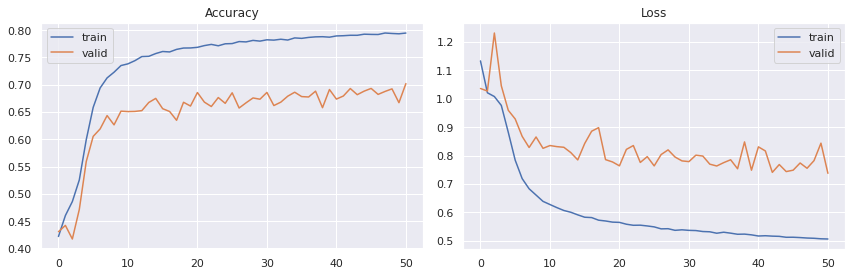

In [25]:
sns.set()
fig = plt.figure(0, (12, 4))

ax = plt.subplot(1, 2, 1)
sns.lineplot(history.epoch, history.history['accuracy'], label='train')
sns.lineplot(history.epoch, history.history['val_accuracy'], label='valid')
plt.title('Accuracy')
plt.tight_layout()

ax = plt.subplot(1, 2, 2)
sns.lineplot(history.epoch, history.history['loss'], label='train')
sns.lineplot(history.epoch, history.history['val_loss'], label='valid')
plt.title('Loss')
plt.tight_layout()

plt.savefig('epoch_history_dcnn.png')
plt.show()